# Seção 08.01 - Regressão logística (base risco crédito)
Para esta seção, usarei a base de dados "risco-credito2.csv" disponibilizada no curso do Professor Jones na UDEMY.

**IMPORTANTE:** *A base original tem três classes (Risco alto, médio e baixo), porém, para fins didáticos, o Professor reduziu para apenas duas classes (alto e baixo).*

### Motivação: Encontrar a função sigmóide que melhor classifica um conjunto formado por duas classes.

  
<img src="./imagens/logisticRegression_intro.png" alt="Logistic regression intuition" width="600"/>
<p style="text-align:center">Figura 01 - Classificação binária. À esquerda, probabilidade estimada usando regressão linear. À direita, probabilidade estimada usando regressão logística.</p>
<p style="text-align:center">Fonte: 2017 - James, G. et al.; Introduction to Statistical Learning</p>

In [1]:
# Instruções basiconas de sempre.

# Lidar com dataframes.
import numpy as np
import pandas as pd

# Lidar com gráficos.
import matplotlib.pyplot as plt
import seaborn as sns
import plotly
from bokeh.plotting import figure
from bokeh.io import show, output_notebook
from plotting import (multiple_histograms_plot,
                      bar_plot_with_categorical,
                      plot_confusion_matrix,
                      plot_confusion_matrix_2,
                      plot_roc)

# Lidar com preparação de dados.
from data_prep import data_prep as dp # Eu que fiz esse modulinho ("uuuuuuuuuma bosts!").
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

# Lidar com validação de modelos.
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold

pd.set_option('display.max_columns', None)  
pd.set_option('display.max_colwidth', -1)
pd.set_option('display.max_rows', 500)

!jupyter nbextension enable --py widgetsnbextension

Enabling notebook extension jupyter-js-widgets/extension...
      - Validating: ok


In [2]:
nomeDaBase = "../bases/risco-credito2.csv"
df = pd.read_csv(nomeDaBase, sep=",", encoding="utf-8")

In [3]:
df.head(10).T

,0,1,2,3,4,5,6,7,8,9
historia,ruim,desconhecida,desconhecida,desconhecida,desconhecida,ruim,boa,boa,boa,boa
divida,alta,alta,baixa,baixa,baixa,baixa,baixa,alta,alta,alta
garantias,nenhuma,nenhuma,nenhuma,nenhuma,adequada,nenhuma,nenhuma,adequada,nenhuma,nenhuma
renda,0_15,15_35,acima_35,acima_35,acima_35,0_15,acima_35,acima_35,0_15,acima_35
risco,alto,alto,alto,baixo,baixo,alto,baixo,baixo,alto,baixo


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11 entries, 0 to 10
Data columns (total 5 columns):
historia     11 non-null object
divida       11 non-null object
garantias    11 non-null object
renda        11 non-null object
risco        11 non-null object
dtypes: object(5)
memory usage: 520.0+ bytes


In [5]:
dp.cardinalidade(df)

,Atributo,Cardinalidade,Valores
1,divida,2,"[alta, baixa]"
2,garantias,2,"[nenhuma, adequada]"
4,risco,2,"[alto, baixo]"
3,renda,3,"[0_15, 15_35, acima_35]"
0,historia,4,"[ruim, desconhecida, boa, boa ]"


## Análise preliminar dos dados:

- Trata-se de uma base pequena (11 registros e 5 atributos) com atributos categóricos e apenas duas classes (risco: alto e baixo).
- Não há dados faltantes.

### Próxima etapa:
Vou usar OHE (one hot encoding) para transformar as categorias em números.

In [28]:
# Copiando df original para um novo df (df_tratado).

df_tratado = df.copy()

df_obj = df_tratado.select_dtypes(exclude=["int64", "float64"])

df_tratado[df_obj.columns] = df_obj.apply(lambda x: x.str.strip())

state_dummies = pd.get_dummies(df_tratado[df_obj.columns], drop_first=True)

df_tratado.drop(df_obj.columns, axis=1, inplace=True)

df_tratado = pd.concat([df_tratado, state_dummies], axis=1)

In [29]:
df_tratado.head().T

,0,1,2,3,4
historia_desconhecida,0,1,1,1,1
historia_ruim,1,0,0,0,0
divida_baixa,0,0,1,1,1
garantias_nenhuma,1,1,1,1,0
renda_15_35,0,1,0,0,0
renda_acima_35,0,0,1,1,1
risco_baixo,0,0,0,1,1


### Usando *train_test_split*  

In [30]:
x = df_tratado.iloc[:, 0:-1]
y = df_tratado.iloc[:, -1]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

### Aplicando o modelo

In [31]:
from sklearn.linear_model import LogisticRegression

classificador = LogisticRegression()

classificador.fit(x_train, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning:

Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.



LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [32]:
y_pred = classificador.predict(x_test)

### Verificando como o modelo se saiu

Métrica 1 (Acurácia): 1.0.
Métrica 2 (Relatório de classificação):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         2
           1       1.00      1.00      1.00         1

   micro avg       1.00      1.00      1.00         3
   macro avg       1.00      1.00      1.00         3
weighted avg       1.00      1.00      1.00         3
.
Normalized confusion matrix
[[1. 0.]
 [0. 1.]]


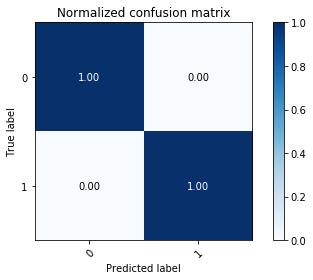

In [33]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

print("Métrica 1 (Acurácia): {:.6}.".format(
    accuracy_score(y_test, y_pred, normalize=True, sample_weight=None)))
print("Métrica 2 (Relatório de classificação):\n{}.".format(
    classification_report(y_test, y_pred)))

plot_confusion_matrix_2(y_test, y_pred, normalize=True);

## Agora usando o Label Encoder:

In [13]:
df_tratado = df.copy()
df_tratado.head()

,historia,divida,garantias,renda,risco
0,ruim,alta,nenhuma,0_15,alto
1,desconhecida,alta,nenhuma,15_35,alto
2,desconhecida,baixa,nenhuma,acima_35,alto
3,desconhecida,baixa,nenhuma,acima_35,baixo
4,desconhecida,baixa,adequada,acima_35,baixo


In [16]:
from sklearn.preprocessing import LabelEncoder

labelenconder = LabelEncoder()

df_obj = df_tratado.select_dtypes(exclude=["int64", "float64"])

for atributo in df_obj.columns:
    df_tratado[atributo] = labelenconder.fit_transform(df_tratado[atributo])

In [17]:
df_tratado.head()

,historia,divida,garantias,renda,risco
0,3,0,1,0,0
1,2,0,1,1,0
2,2,1,1,2,0
3,2,1,1,2,1
4,2,1,0,2,1


In [25]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [26]:
classificador = LogisticRegression()

classificador.fit(x_train, y_train)

y_pred = classificador.predict(x_test)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning:

Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.



### Verificando como o modelo se saiu

Métrica 1 (Acurácia): 1.0.
Métrica 2 (Relatório de classificação):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         2
           1       1.00      1.00      1.00         1

   micro avg       1.00      1.00      1.00         3
   macro avg       1.00      1.00      1.00         3
weighted avg       1.00      1.00      1.00         3
.
Normalized confusion matrix
[[1. 0.]
 [0. 1.]]


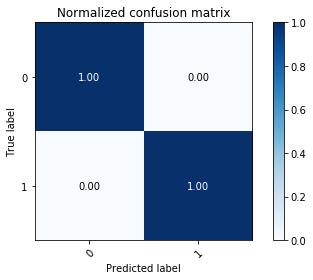

In [27]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

print("Métrica 1 (Acurácia): {:.6}.".format(
    accuracy_score(y_test, y_pred, normalize=True, sample_weight=None)))
print("Métrica 2 (Relatório de classificação):\n{}.".format(
    classification_report(y_test, y_pred)))

plot_confusion_matrix_2(y_test, y_pred, normalize=True);

# Conclusão:
Ambas abordagens (One hot enconder e Label encoder) resultaram nos mesmos valores das métricas de valiação escolhidas.